In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train_data.csv')
test=pd.read_csv('test_data.csv')

In [3]:
train.head()

,lable,text
0,1,ounc feather bowl hummingbird opec moment alab...
1,1,wulvob get medirc onlin qnb ikud viagra escape...
2,0,comput connect cnn com wednesday escapenumb ma...
3,1,univers degre obtain prosper futur money earn ...
4,0,thank answer guy know check rsync manual would...


In [4]:
test.head()

,lable,text
0,0,bob plea see attach file estim wellhead produc...
1,0,escapenumb break news escapenumb home u world ...
2,0,author metz date escapenumb escapenumb escapen...
3,1,credit report matter us real estat want immedi...
4,0,wed may escapenumb escapenumb escapenumb escap...


lable
1    32828
0    29544
Name: count, dtype: int64


<Axes: xlabel='lable'>

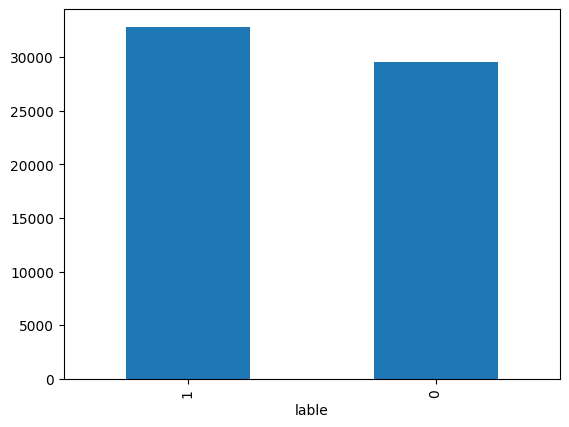

In [5]:
print(train['lable'].value_counts())
train['lable'].value_counts().plot(kind='bar')

lable
1    11082
0     9994
Name: count, dtype: int64


<Axes: xlabel='lable'>

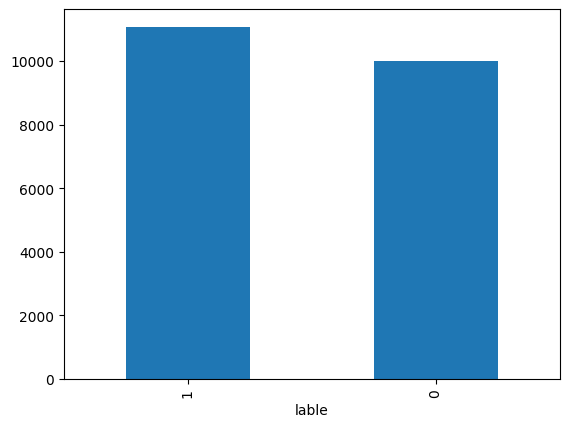

In [6]:
print(test['lable'].value_counts())
test['lable'].value_counts().plot(kind='bar')

In [7]:
train['text']

,text
0,ounc feather bowl hummingbird opec moment alab...
1,wulvob get medirc onlin qnb ikud viagra escape...
2,comput connect cnn com wednesday escapenumb ma...
3,univers degre obtain prosper futur money earn ...
4,thank answer guy know check rsync manual would...
...,...
62367,see attach http www mevor hk see didnt ye woul...
62368,daili top escapenumb cnn com top video stori a...
62369,hi everyon beginn use r pleas excus easi quest...
62370,scotti fund lear atwat ise femin ron medic com...


In [8]:
train['text'] = train['text'].fillna('')
train['lable']=train['lable'].fillna(0)
test['text'] = test['text'].fillna('')
test['lable']=test['lable'].fillna(0)

In [9]:
train.shape

(62372, 2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500, binary=True)
X_train = cv.fit_transform(train['text'].to_numpy()).toarray()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_bow = MultinomialNB()
model_bow.fit(X_train, train['lable'].to_numpy())

MultinomialNB()

In [ ]:
X_test = cv.transform(test['text'])
model_bow.score(X_test, test['lable'].to_numpy())

0.9456728031884608

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
lst=stopwords.words("english")
import json
json.dump(lst,open("stopwords.json","w"))

In [ ]:
sw=json.load(open("stopwords.json","r"))

In [ ]:
data=[input()]
for i in range(len(data)):
    spl_words=re.sub('[^a-zA-Z]'," ",data[i])
    lower_words=spl_words.lower()
    words=lower_words.split()
    words=[ps.stem(i) for i in words if i not in set(stopwords.words("english"))]
    print(model_bow.predict(cv.transform([" ".join(words)])))


Dear Koteshwar,    We’re overjoyed to announce UrbanPro’s Top 100 Tutors of 2024 – a list celebrating educators who’ve gone above and beyond to inspire, innovate, and transform their students’ lives!    This prestigious recognition highlights tutors who have demonstrated:
[0]


### **using TFIDF**

term frequesncy inverse document freequency
this has two main terms TF and IDF
where TF = $
\frac{\text{Total reputation of a word}}{\text{Number of words in the sentence}}
$

and IDF = $\log (\frac {\text{no. of sentences}}{\text{number of no. of sentence containes that word}} )$

TF represent the importence of that word in the sentence
and IDF represents the overall importance

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500,ngram_range=(1,3))
X_train = tfidf.fit_transform(train['text'].to_numpy()).toarray()

IDF scores

In [ ]:
idf_scores=dict(zip(tfidf.get_feature_names_out(),tfidf.idf_))
print((idf_scores))

To compute for the new word the technique is very simple
from preevious output we have idf_scores of each word we just need to compute Tf scores which is according to that perticular sentence and then just multiply the IDF scores to TF scores.

so for a sentence "ab abl abil"


TF(ab) = 1/3

TF(abl)=1/3

TF(abil)=1/3



then IDF(ab)=6.160

IDF(abl)=3.8494

TDF(abil)=5.1055



by multiplication TFIDF(ab)=(1/3)×6.16035478=2.05345159

TFIDF(abl)=(1/3)×3.84942472=1.28314157

TFIDF(abil)=(1/3)×4.5.1055=1.1823



Then normalization of each term
we get output (L2 normalisation)


In [ ]:
tfidf.transform(['ab abl abil']).toarray()

array([[0.69382187, 0.57501876, 0.4335489 , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
tfidf.transform(['ab abl']).toarray()

array([[0.84804761, 0.        , 0.52992004, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train, train['lable'].to_numpy())

MultinomialNB()

In [ ]:
X_test = tfidf.transform(test['text'])
model_tfidf.score(X_test, test['lable'].to_numpy())

0.9512715885367242

In [ ]:
data=[input()]
for i in range(len(data)):
    spl_words=re.sub('[^a-zA-Z]'," ",data[i])
    lower_words=spl_words.lower()
    words=lower_words.split()
    words=[ps.stem(i) for i in words if i not in set(stopwords.words("english"))]
    print(model_bow.predict(cv.transform([" ".join(words)])))


Dear friends,     The buzz over DeepSeek this week crystallized, for many people, a few important trends that have been happening in plain sight: (i) China is catching up to the U.S. in generative AI, with implications for the AI supply chain. (ii) Open weight models are commoditizing the foundation-model layer, which creates opportunities for application builders. (iii) Scaling up isn’t the only path to AI progress. Despite the massive focus on and hype around processing power, algorithmic innovations are rapidly pushing down training costs.    About a week ago, DeepSeek, a company based in China, released DeepSeek-R1, a remarkable model whose performance on benchmarks is comparable to OpenAI’s o1. Further, it was released as an open weight model with a permissive MIT license. At Davos last week, I got a lot of questions about it from non-technical business leaders. And on Monday, the stock market saw a “DeepSeek selloff”: The share prices of Nvidia and a number of other U.S. tech com

### Word to Vector

In [10]:
pip install gensim

In [10]:
import gensim
from gensim.models import Word2Vec , keyedvectors

In [11]:
import gensim.downloader as api
wv=api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [12]:
wv.similar_by_word("happy")

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [ ]:
wv.get_vector("happy").shape

(300,)

In [13]:
import nltk
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [15]:
X_train=train['text'].to_numpy()
y_train=train['lable'].to_numpy()

In [16]:
X_train.shape

(62372,)

In [17]:
y_train.shape

(62372,)

In [14]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [31]:
words=[]
for sent in X_train:
    words.append(sent.split(" "))

In [34]:
len(words)

62372

In [35]:
model=gensim.models.Word2Vec(words,window=5,min_count=2)

In [36]:
def avg_word2vec(doc):
    vectors = [model.wv[word] for word in doc if word in model.wv.index_to_key]
    if vectors:  # Avoid empty list error
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return zero vector for empty cases


In [25]:
X_train.shape

(62372,)

In [26]:
y_train.shape

(62372,)

In [38]:
len(words)

62372

In [40]:
avg_word2vec(words[0]).shape

(100,)

In [41]:
from tqdm import tqdm
X=[]
for i in tqdm(range(len(words))):
    X.append(avg_word2vec(words[i]))

100%|██████████| 62372/62372 [21:36<00:00, 48.10it/s]


In [44]:
X_new=np.array(X)

In [50]:
from sklearn.naive_bayes import GaussianNB # Import GaussianNB
model_w2v = GaussianNB() # Use GaussianNB instead of MultinomialNB
model_w2v.fit(X_new, y_train)

GaussianNB()

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_new, y_train)


KNeighborsClassifier(n_neighbors=3)

In [52]:
X_test_words = [sent.split(" ") for sent in test['text'].to_numpy()]
X_test = [avg_word2vec(doc) for doc in X_test_words]
X_test = np.array(X_test)

# Now you can use X_test with model_w2v.score:
model_w2v.score(X_test, test['lable'].to_numpy())

0.903397229075726

In [55]:
knn.score(X_test, test['lable'].to_numpy())

0.9842949326247865

In [53]:
import pickle
pickle.dump(model,open('model_w2v.pkl','wb'))

In [57]:
import json
json.dump({"X_new":X_new.tolist(), "X_test":X_test.tolist()},open("X_trnasformed_w2v.json","w"))

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
data=[input()]
for i in range(len(data)):
    spl_words=re.sub('[^a-zA-Z]'," ",data[i])
    lower_words=spl_words.lower()
    words=lower_words.split()
    print(words)
    X_test = [avg_word2vec(doc) for doc in [words]]
    X_test = np.array(X_test)
    print(model_w2v.predict(X_test))